Using TensorFlow backend.


------------------------------------------------------------------ starting -----------------
           |Model built
--------------------- End of loading ------------------------------
                     |Loss:  2451
Train on 7141 samples, validate on 1531 samples
Epoch 1/14
7141/7141 [==============================] - 231s 32ms/step - loss: 0.3247 - acc: 0.0035 - val_loss: 0.3943 - val_acc: 0.0059
Epoch 2/14
7141/7141 [==============================] - 219s 31ms/step - loss: 0.1533 - acc: 0.0052 - val_loss: 0.7043 - val_acc: 0.0039
Epoch 3/14
7141/7141 [==============================] - 219s 31ms/step - loss: 0.1264 - acc: 0.0053 - val_loss: 0.2219 - val_acc: 0.0039
Epoch 4/14
7141/7141 [==============================] - 220s 31ms/step - loss: 0.1232 - acc: 0.0053 - val_loss: 0.2884 - val_acc: 0.0065
Epoch 5/14
7141/7141 [==============================] - 221s 31ms/step - loss: 0.1203 - acc: 0.0052 - val_loss: 0.1409 - val_acc: 0.0072
Epoch 6/14
7141/7141 [=========================

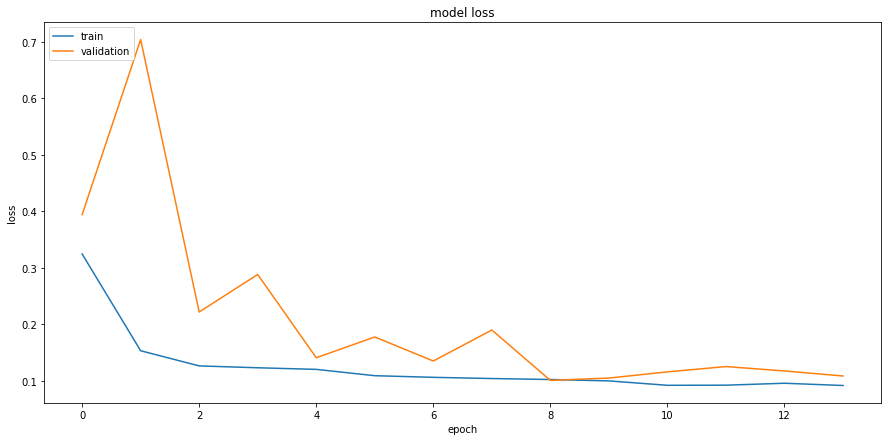

             |Training ok ...
RMSE_znorm             0.103281
bias_znorm             0.095695
std_znorm              0.095695
RMSE                   0.146004
|znorm| > 0.15 (%)    10.522876
|znorm| > 3std (%)     1.895425
Name: Redshift, dtype: float64


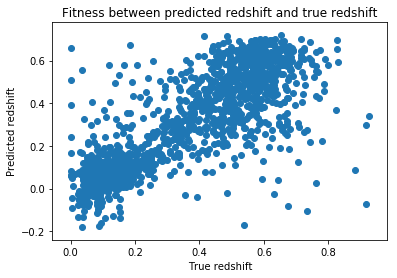

----------------------------------------- End ---------------------------------------


In [1]:
from utils2 import *
from keras.layers import Input as I
from utils import *

print('------------------------------------------------------------------ starting -----------------')
batch_size = 128
data = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all/*.npy'

model = get_basic_residual_model(layer_number = 12, k = 3, start_size = 8)

print('           |Model built')

X_Train, Y_Train, X_Test, Y_Test, X_Valid, Y_Valid = get_train_test_valid_data_galaxy(data,dir_img,test_size=0.3, valid_size = 0.5)

history = model.fit(X_Train, Y_Train, validation_data=(X_Valid, Y_Valid), epochs=14, batch_size=batch_size, verbose=1)
#batch_size = 10#128
#data = '../data/csvs/galaxies/all1_.csv';
#dir_img = '../data/images/galaxies1/all'

#Saving ploting
save_model(model, './model_residual.json')
plot_history(history);

print('             |Training ok ...')

#Testing and ploting of result
predict = model.predict(X_Test, batch_size=batch_size).reshape(-1)
result = compute_metrics(Y_Test, predict, 'Redshift')     
print(result)
plot_result(Y_Test, predict)

print('----------------------------------------- End ---------------------------------------')